In [1]:
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
Dataset_path =("/content/breastcancer_modified.csv.csv")
df = pd.read_csv(Dataset_path)
print("\nDataset Overview:", df.head())


Dataset Overview:          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  are

In [3]:
if 'id' in df.columns:
  df= df.drop(columns=['id'])
if 'diagnosis' in df.columns:
  df= df.drop(columns=['diagnosis'])

In [4]:
df = df.dropna(axis=1, thresh=int(0.8 * len(df)))
scaler= StandardScaler()
X_scaled= scaler.fit_transform(df)

In [5]:
k=2
kmeans= KMeans(n_clusters=k, random_state=100, n_init=10)
df['Cluster']= kmeans.fit_predict(X_scaled)

In [6]:
pca = PCA(n_components=2)
X_pca= pca.fit_transform(X_scaled)

In [7]:
df['PCA1']= X_pca[:,0]
df['PCA2']= X_pca[:,1]

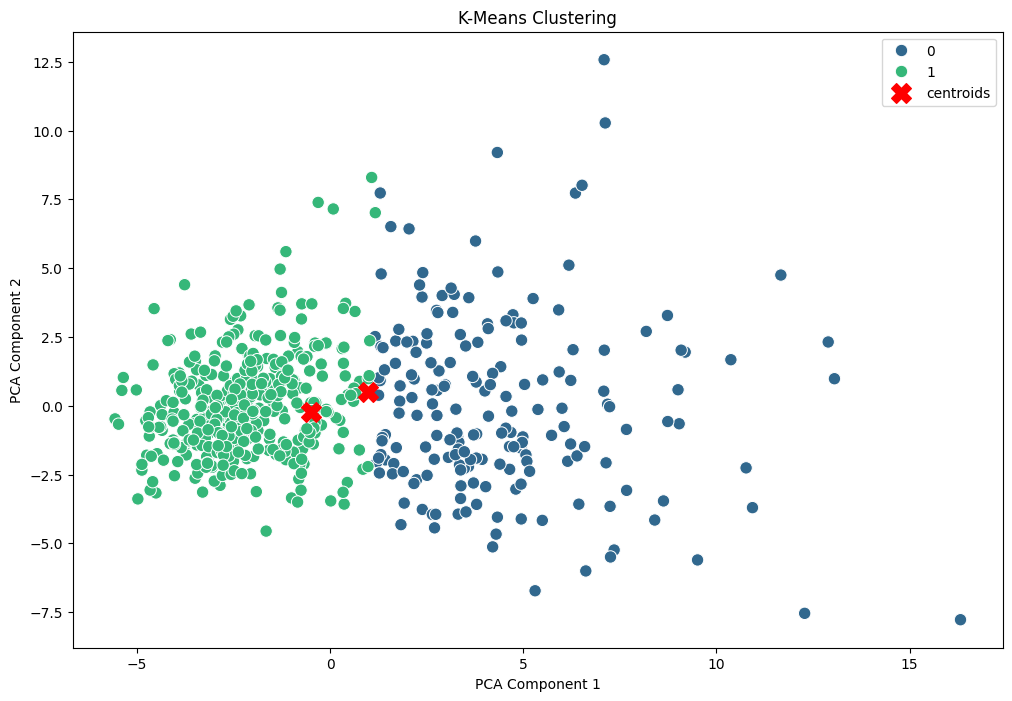


Kmeans Cluster centers: [[ 0.97397614  0.48151381  1.0066346   0.96352718  0.60925407  1.020696
   1.13942935  1.16458212  0.61113855  0.25222982  0.85859633  0.04274078
   0.86027888  0.8071077   0.01706063  0.69505052  0.63689512  0.77623856
   0.14038222  0.41503212  1.04008365  0.50631048  1.06597067  1.00315418
   0.60829274  0.95083725  1.04429844  1.14621103  0.59741617  0.62246932]
 [-0.48442497 -0.23948977 -0.50066826 -0.47922799 -0.30302374 -0.50766196
  -0.56671617 -0.57922637 -0.30396101 -0.12545115 -0.4270387  -0.02125791
  -0.42787555 -0.40142988 -0.00848542 -0.34569618 -0.31677152 -0.38607654
  -0.06982168 -0.20642387 -0.51730476 -0.25182285 -0.53018015 -0.49893721
  -0.3025456  -0.47291642 -0.51940106 -0.57008917 -0.29713594 -0.30959659]]


In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', s=80)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200, marker='X', label= 'centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title("K-Means Clustering")
plt.legend()
plt.show()
print("\nKmeans Cluster centers:",kmeans.cluster_centers_)